שאלות המחקר המבוקשות הן:
1. מהי רמת הקורלציה בין ריכוז בבדיקות השונות, תנועה בבדיקות השונות, מבנה בבדיקות השונות.
2. האם ניתן להגיע לנוסחה מסוימת ולפיה ככלל סטיית התקן שבין שתי הבדיקות דומה פחות או יותר.
3. האם יש קשר בין מקום ביצוע בדיקת הכוסית לבין הקורלציה בנתונים השונים של הבדיקות (דהיינו האם עדיף לשלוח למקום שבו עושים הרבה בדיקות כוסית כי אז הן יהיו יותר מדויקות או שאין משמעות).
4. האם דגימה של כוסית בנפח גבוה יותר (מעל 0.5 מ"ל או מעל 1 מ"ל) נותנת נתונים אמינים יותר?

In [31]:
import xlrd
import pandas as pd
import seaborn as sns

# df = pd.read_excel("check.xls", na_values=['לא ידוע', 'אין'])
df = pd.ExcelFile("https://github.com/aviadm24/jupyter/blob/master/check.xls?raw=true")
df = pd.read_excel(df, na_values=['לא ידוע', 'אין', 'טיפה'])
df.columns = ["id", "hospital", "valume", "con_cup", "con_check", "movement_cup", "movement_check", "formation_cup", "formation_check"]
df.hospital = pd.Categorical(df.hospital)
df['code'] = df.hospital.cat.codes
# df['formation_cup'] = df["formation_cup"].str.repalce("WHO","")
df['formation_cup'] = df['formation_cup'].map(lambda x: str(x).lstrip('WHO').rstrip('WHO'))
df['formation_check'] = df['formation_check'].map(lambda x: str(x).lstrip('WHO').rstrip('WHO'))

ניקוי הדטה כדי שנוכל לעבד אותו

In [32]:
import numpy as np
import numpy.ma as ma

# df['formation_cup'] = df['formation_cup'].fillna(0, inplace=True)
# df['formation_check'] = df['formation_check'].fillna(0, inplace=True)
for index,i in enumerate(df['formation_check']):
    if isinstance(i, str):
        try:
            df['formation_check'][index] = int(i)
        except:
            pass
# print(ma.corrcoef(ma.masked_invalid(df['formation_cup']), ma.masked_invalid(df['formation_check'])))
# msk = (~df['formation_cup'].mask & ~df['formation_check'].mask)

# print(ma.corrcoef(df['formation_cup'][msk],df['formation_check'][msk]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


חישוב קורלציה בין ריכוז בבדיקות השונות, תנועה בבדיקות השונות, מבנה בבדיקות השונות - בכלל בתי החולים

In [33]:
corr_movement = df["movement_cup"].astype('float').corr(df["movement_check"]).astype('float')
corr_consertrat = df["con_cup"].corr(df["con_check"])
corr_formation = df["formation_cup"].astype('float').corr(df["formation_check"].astype('float'))


In [34]:
print("corr_movement: ", corr_movement)
print("corr_consertrat: ", corr_consertrat)
print("corr_formation: ", corr_formation)

corr_movement:  0.6318152917636762
corr_consertrat:  0.7138309800573162
corr_formation:  0.6590311986439481


corr_movement:  0.6318152917636762


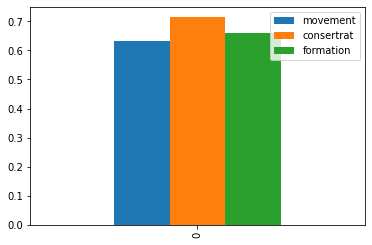

In [35]:
corrDf = pd.DataFrame()
corrDf["movement"] = [corr_movement]
print("corr_movement: ", corr_movement)
corrDf["consertrat"] = [corr_consertrat]
corrDf["formation"] = [corr_formation]
corrDf.plot(kind='bar')

השוואה של תזוזה בבדיקות כוסית ומבחנה

In [36]:
# compareMovement_df = df(data=df, columns=["movement_cup", "movement_check"])
plotDf = pd.DataFrame()
plotDf["moveCup"] = df["movement_cup"]
plotDf["moveCheck"] = df["movement_check"]

In [37]:
plotDf

,moveCup,moveCheck
0,0.0001,0.0001
1,25.0000,20.0000
2,38.0000,20.0000
3,30.0000,55.0000
4,40.0000,40.0000
...,...,...
120,0.0000,0.0000
121,36.0000,50.0000
122,54.0000,36.0000
123,26.0000,20.0000


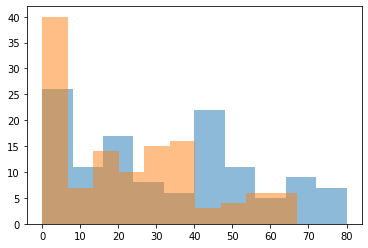

In [38]:
import matplotlib.pyplot as plt
for col in ["moveCheck","moveCup"]:
    plt.hist(plotDf[col], alpha=0.5)

השוואה של קורלציה לפי בית חולים

In [39]:
# print(len(df.groupby(['code']).groups))

In [40]:
# move_list = []
# consert_list = []
# formation_list = []
# group_names = df.hospital.unique()
# for i, name in enumerate(group_names):
# # for i in range(len(df.groupby(['hospital']))):
#     hospital = df.groupby(['hospital']).get_group(name)
#     print("number ", i, "is ", name)
# # for i in range(len(df.groupby(['code']).groups)):
#     # hospital_acher = df.groupby(['code']).get_group(i)
#     corr_movement = hospital["movement_cup"].corr(hospital["movement_check"])
#     corr_consertrat = hospital["con_cup"].corr(hospital["con_check"])
#     corr_formation = hospital["formation_cup"].astype('float').corr(hospital["formation_check"].astype('float'))
#     move_list.append(corr_movement)
#     consert_list.append(corr_consertrat)
#     formation_list.append(corr_formation)
# corr_df = pd.DataFrame()
# corr_df["corr_movement"] = move_list
# corr_df["corr_consertrat"] = consert_list
# corr_df["corr_formation"] = formation_list
# corr_df.plot()

רואים שבבית החולים ביקור חולים יש הבדל גדול בקורלציה בין התזוזה לבין מבנה וריכוז

קורלציה לפי בית חולים

In [41]:
# group_names = df.hospital.unique()
# def plotCorrByHospital(df):
#   for name in group_names:
#   # for i in range(len(df.groupby(['hospital']))):
#     hospital_number = df.groupby(['hospital']).get_group(name)
#     corr_movement = hospital_number["movement_cup"].corr(hospital_number["movement_check"])
#     corr_consertrat = hospital_number["con_cup"].corr(hospital_number["con_check"])
#     corr_formation = hospital_number["formation_cup"].astype('float').corr(hospital_number["formation_check"].astype('float'))
#     corr_df = pd.DataFrame()
#     corr_df["corr_movement"] = [corr_movement]
#     corr_df["corr_consertrat"] = [corr_consertrat]
#     corr_df["corr_formation"] = [corr_formation]
#     plt = corr_df.plot(kind="bar", title = name)
#     plt.set_xlabel("x label")
#     plt.set_ylabel("y label")
# plotCorrByHospital(df)

def getCorrAndPlot(df, **kwargs):
  print(kwargs)
  corr_movement = df["movement_cup"].corr(df["movement_check"])
  corr_consertrat = df["con_cup"].corr(df["con_check"])
  corr_formation = df["formation_cup"].astype('float').corr(df["formation_check"].astype('float'))
  corr_df = pd.DataFrame()
  corr_df["corr_movement"] = [corr_movement]
  corr_df["corr_consertrat"] = [corr_consertrat]
  corr_df["corr_formation"] = [corr_formation]
  plt = corr_df.plot(kind="bar", title = kwargs['name'])
  plt.set_xlabel("x label")
  plt.set_ylabel("y label")  

In [42]:
# df.replace(to_replace='טיפה', value=0)
df['valume'] = df['valume'].astype(float)


השוואת קורלציה כשהנפח מעל ל 0.5

In [43]:
# plotCorrByHospital(df[df.valume > 0.5])

השוואת קורלציה כשהנפח מתחת ל 0.5

{'name': 'underPoint5'}


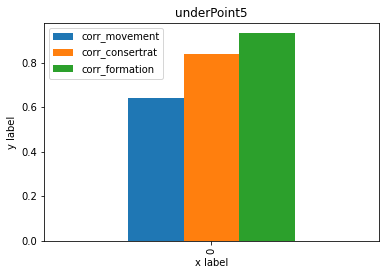

In [44]:
getCorrAndPlot(df[df.valume < 0.5], name="underPoint5")

{'name': 'overPoint5'}
{'name': 'over1'}


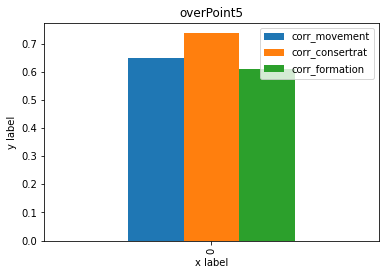

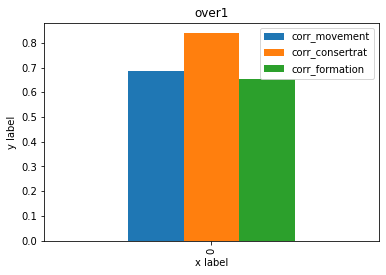

In [45]:
getCorrAndPlot(df[df.valume >= 0.5], name="overPoint5")
getCorrAndPlot(df[df.valume >= 1], name="over1")